In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
os.makedirs("./cat_dog")

In [5]:
file = zipfile.ZipFile("./cats_and_dogs_filtered.zip","r")
file.extractall("./cat_dog/")

In [11]:
train_dir = "./cat_dog/cats_and_dogs_filtered/train/"
train_cat = "./cat_dog/cats_and_dogs_filtered/train/cats/"
train_dog = "./cat_dog/cats_and_dogs_filtered/train/dogs/"

test_dir  = "./cat_dog/cats_and_dogs_filtered/validation/"
test_dog  = "./cat_dog/cats_and_dogs_filtered/validation/dogs/"
test_cat  = "./cat_dog/cats_and_dogs_filtered/validation/cats/"

In [14]:
print("Train data details :\n**************************************")
print("Total no of Dogs' pic : %s"%str(len(os.listdir(train_dog))))
print("Total no of Cats' pic : %s"%str(len(os.listdir(train_cat))))

print("\nTest data details :\n**************************************")
print("Total no of Dogs' pic : %s"%str(len(os.listdir(test_dog))))
print("Total no of Cats' pic : %s"%str(len(os.listdir(test_cat))))

Train data details :
**************************************
Total no of Dogs' pic : 1000
Total no of Cats' pic : 1000

Test data details :
**************************************
Total no of Dogs' pic : 500
Total no of Cats' pic : 500


In [36]:
batch_size   = 20
image_height = 300
image_width  = 300

In [37]:
train_datagen = ImageDataGenerator(rescale=(1.0 / 255.0))
test_datagen  = ImageDataGenerator(rescale=(1.0 / 255.0))

In [38]:
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(image_height,image_width),
                                              batch_size=batch_size,
                                              class_mode='binary')

test_data  = test_datagen.flow_from_directory(test_dir,
                                             target_size=(image_height,image_width),
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
#Basic NN

In [40]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(image_height,image_width,3)),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [41]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [42]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 270000)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               69120256  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 69,120,513
Trainable params: 69,120,513
Non-trainable params: 0
_________________________________________________________________


In [43]:
history1 = model1.fit(train_data,steps_per_epoch=1000//batch_size,epochs=5,
                      validation_data=test_data,validation_steps=500//batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 25 steps
Epoch 1/5
50/50 [==============================] - 214s 4s/step - loss: 86.3234 - acc: 0.5200 - val_loss: 16.7697 - val_acc: 0.5320
Epoch 2/5
50/50 [==============================] - 97s 2s/step - loss: 12.9173 - acc: 0.5370 - val_loss: 3.8427 - val_acc: 0.4740
Epoch 3/5
50/50 [==============================] - 69s 1s/step - loss: 7.3132 - acc: 0.5340 - val_loss: 4.9934 - val_acc: 0.4720
Epoch 4/5
50/50 [==============================] - 71s 1s/step - loss: 6.5472 - acc: 0.5410 - val_loss: 8.0645 - val_acc: 0.4680
Epoch 5/5
50/50 [==============================] - 233s 5s/step - loss: 6.1820 - acc: 0.5310 - val_loss: 3.8109 - val_acc: 0.4800


In [44]:
def loss_acc(history):
    fig,ax = plt.subplots(1,2,figsize=(16,7))
    
    ax[0].plot(history.history['acc'],label="Train",marker="o")
    ax[0].plot(history.history['val_acc'],label="Test",marker="o")
    ax[0].set_title("Accurecy")
    ax[0].legend()
    
    ax[1].plot(history.history['loss'],label="Train",marker="o")
    ax[1].plot(history.history['val_loss'],label="Test",marker="o")
    ax[1].set_title("loss")
    ax[1].legend()

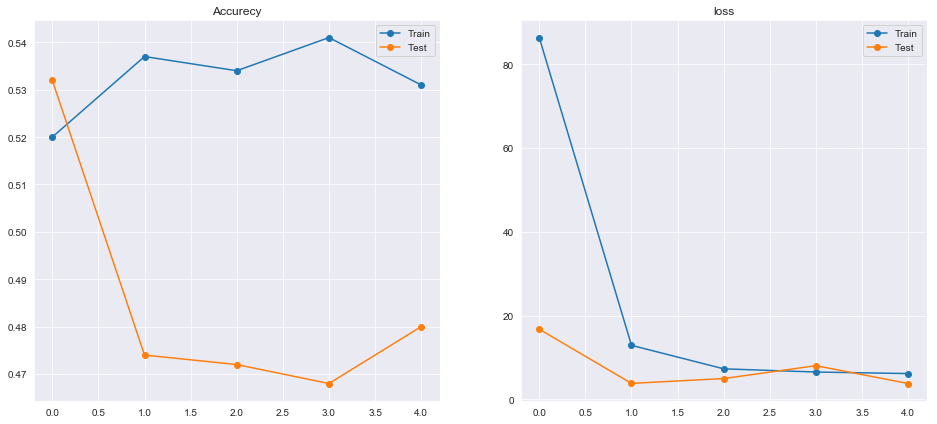

In [45]:
loss_acc(history1)

In [31]:
#3layer cnn

In [47]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(image_height,image_width,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model2.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 78400)            

In [48]:
history2 = model2.fit(train_data,steps_per_epoch=1000//batch_size,epochs=5,
                      validation_data=test_data,validation_steps=500//batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 25 steps
Epoch 1/5
50/50 [==============================] - 163s 3s/step - loss: 1.0420 - acc: 0.5450 - val_loss: 0.7450 - val_acc: 0.5320
Epoch 2/5
50/50 [==============================] - 140s 3s/step - loss: 0.7379 - acc: 0.6290 - val_loss: 0.6415 - val_acc: 0.5920
Epoch 3/5
50/50 [==============================] - 141s 3s/step - loss: 0.6365 - acc: 0.6710 - val_loss: 0.6179 - val_acc: 0.6940
Epoch 4/5
50/50 [==============================] - 141s 3s/step - loss: 0.5733 - acc: 0.7170 - val_loss: 0.5856 - val_acc: 0.6700
Epoch 5/5
50/50 [==============================] - 142s 3s/step - loss: 0.5354 - acc: 0.7610 - val_loss: 0.6131 - val_acc: 0.6940


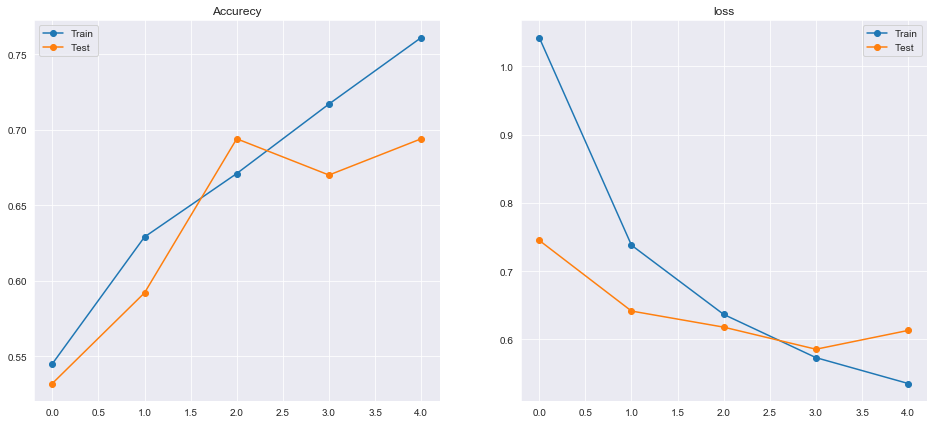

In [49]:
loss_acc(history2)

In [50]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(image_height,image_width,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model3.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

model3.summary()

history3 = model3.fit(train_data,steps_per_epoch=1000//batch_size,epochs=5,
                      validation_data=test_data,validation_steps=500//batch_size)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 71, 71, 64)       

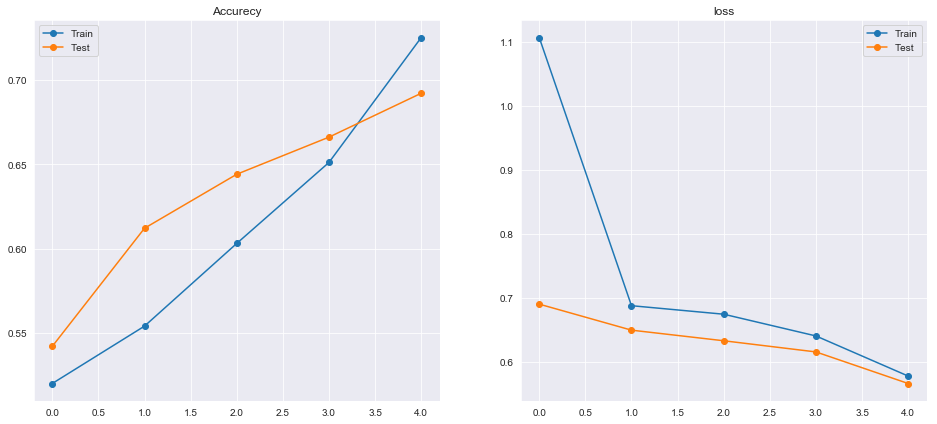

In [51]:
loss_acc(history3)